### The purpose of this notebook to create a EDA for the Kepler exoplanet discovery dataset. We want to use the information available to predict whether the objects found are planets or not. 

## The first step is to load the dataset and inspect the data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
planet_dataset = pd.read_csv('../data/cumulative.csv')
print(planet_dataset.head(10))
print(planet_dataset.info)
print(planet_dataset.describe)
print(planet_dataset.columns)

# Check for null values in the dataset

missing = planet_dataset.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

   rowid     kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0      1  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1      2  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2      3  10811496  K00753.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
3      4  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4      5  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   
5      6  10872983  K00756.01  Kepler-228 d       CONFIRMED        CANDIDATE   
6      7  10872983  K00756.02  Kepler-228 c       CONFIRMED        CANDIDATE   
7      8  10872983  K00756.03  Kepler-228 b       CONFIRMED        CANDIDATE   
8      9   6721123  K00114.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
9     10  10910878  K00757.01  Kepler-229 c       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  ...  \
0      1.000              0              0           

### With a dataset with 50 columns we definitley want to do some trimming and make the dataset a bit more manageable.There are plenty of columns with identifiers that dont help with our analysis ie. ('kepler_name'). There are also a large amount of columns with error margin data that is not useful. I am going to start the cleaning by selecting a few columns that will be crutial for analysis in detecting exoplanets.

### Selected Features for Analysis

Below are the features retained for analysis and modeling, along with their descriptions:

| Feature         | Description |
|----------------|-------------|
| `kopoi_name`   | Identifier information |
| `koi_prad`     | Estimated radius of the planet (in Earth radii) |
| `koi_period`   | Orbital period of the planet (in days) |
| `koi_steff`    | Effective temperature of the host star (in Kelvin) |
| `koi_slogg`    | Log surface gravity of the host star (in cgs units) |
| `koi_srad`     | Radius of the host star (in Solar radii) |
| `koi_teq`      | Estimated equilibrium temperature of the planet (in Kelvin) |
| `koi_depth`    | Transit depth (the amount of light blocked during transit) |
| `koi_duration` | Duration of the transit (in hours) |
| `koi_score`    | Disposition score — NASA's confidence level in candidate status |
| `koi_disposition` | Final classification — CONFIRMED, FALSE POSITIVE, or CANDIDATE |


In [48]:
columns_to_keep = ['kepoi_name', 'koi_prad', 'koi_period', 'koi_steff', 'koi_slogg', 'koi_srad',
'koi_teq', 'koi_depth', 'koi_duration', 'koi_score', 'koi_disposition']

planet_dataset = planet_dataset[columns_to_keep]
planet_dataset = planet_dataset.dropna()

print(planet_dataset.info())
print(planet_dataset.head(10))

planet_dataset['koi_disposition'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Index: 7995 entries, 0 to 9563
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kepoi_name       7995 non-null   object 
 1   koi_prad         7995 non-null   float64
 2   koi_period       7995 non-null   float64
 3   koi_steff        7995 non-null   float64
 4   koi_slogg        7995 non-null   float64
 5   koi_srad         7995 non-null   float64
 6   koi_teq          7995 non-null   float64
 7   koi_depth        7995 non-null   float64
 8   koi_duration     7995 non-null   float64
 9   koi_score        7995 non-null   float64
 10  koi_disposition  7995 non-null   object 
dtypes: float64(9), object(2)
memory usage: 749.5+ KB
None
  kepoi_name  koi_prad  koi_period  koi_steff  koi_slogg  koi_srad  koi_teq  \
0  K00752.01      2.26    9.488036     5455.0      4.467     0.927    793.0   
1  K00752.02      2.83   54.418383     5455.0      4.467     0.927    443.0   
2  K

koi_disposition
FALSE POSITIVE    3922
CONFIRMED         2281
CANDIDATE         1792
Name: count, dtype: int64

### Exploratory Analysis

We will use different plots to understand the distribution of our data as well as the correltion between different columns. This will help us decide what is useful for our model. 

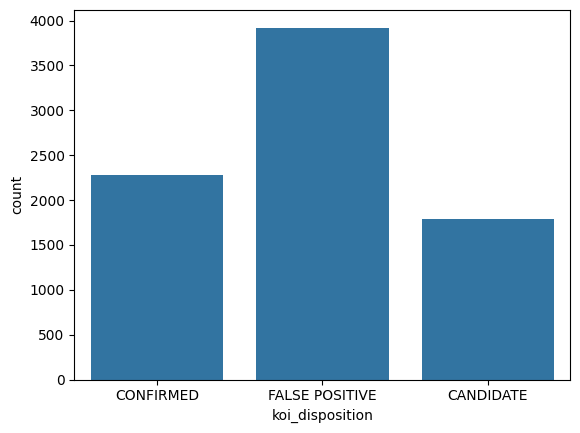

In [49]:
sns.countplot(data=planet_dataset, x='koi_disposition')

numeric_planet_dataset = planet_dataset.drop(columns=['kepoi_name', 'koi_disposition'])

### As we can see, the koi_disposition is distrubuted with an ovious mode of False Positive and about half of the time we get a confirmed planet. For now, we are going to ignore the entries with candidate, since we need more in order to classify them correctly. For now, we are going to train our model on confirmed and false positve, then later use our model to classify the candidate class. 

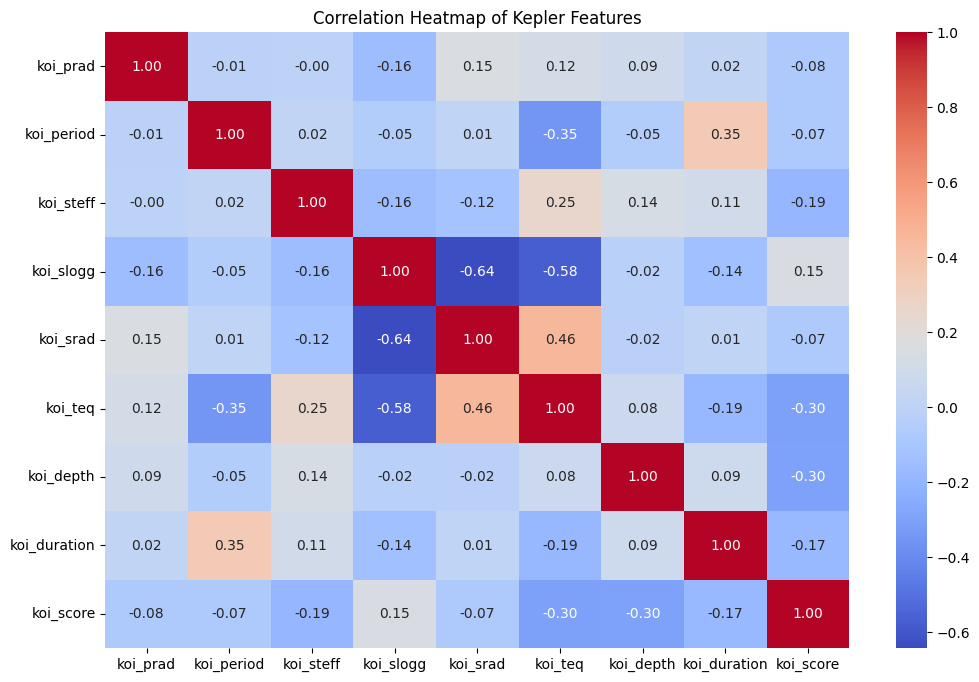

In [50]:

# Create the correlation matrix
corr_matrix = numeric_planet_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Kepler Features')
plt.show()

We are going to explore the correlation matrix to find some helpful insights about the planet data that might lead to classifying their koi_disposition values. 

Here are the relevant labels and what they mean to help us

| Feature         | Description |
|----------------|-------------|
| `koi_prad`     | Estimated radius of the planet (in Earth radii) |
| `koi_period`   | Orbital period of the planet (in days) |
| `koi_steff`    | Effective temperature of the host star (in Kelvin) |
| `koi_slogg`    | Log surface gravity of the host star (in cgs units) |
| `koi_srad`     | Radius of the host star (in Solar radii) |
| `koi_teq`      | Estimated equilibrium temperature of the planet (in Kelvin) |
| `koi_depth`    | Transit depth (the amount of light blocked during transit) |
| `koi_duration` | Duration of the transit (in hours) |
| `koi_score`    | Disposition score — NASA's confidence level in candidate status |


The correlation heatmap above shows how numerical features in the Kepler exoplanet dataset relate to one another. Here are some notable observations:

 * Surface gravity (koi_slogg) and stellar radius (koi_srad) show a strong negative correlation (-0.64). This makes sense physically—larger stars generally have lower surface gravity.

 * Stellar effective temperature (koi_steff) is negatively correlated with koi_slogg (-0.16) and positively correlated with equilibrium temperature (koi_teq) (0.25), indicating that hotter stars often result in hotter planets.

 * Equilibrium temperature (koi_teq) and stellar radius (koi_srad) are moderately correlated (0.46), suggesting that larger stars may contribute to higher planetary temperatures.

 * koi_score, which represents the model's confidence in the planetary nature of the candidate, has negative correlations with several features, including:

    - koi_teq: -0.30

    - koi_depth: -0.30

    - koi_duration: -0.17

    - koi_steff: -0.19

These negative correlations may indicate that deeper or shorter transits and higher equilibrium temperatures are associated with lower confidence scores.

Overall, the correlations are relatively weak across most features, suggesting that multiple variables together may be more informative than any single one individually. This motivates the use of machine learning models that can capture these complex relationships.

Next I am going to encode the koi_disposition and see if I can find any useful information when using that in our EDA. 


/var/folders/28/d2b1gshn5v94b_tk47b_x53r0000gn/T/ipykernel_67716/1512292820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_planet_dataset['binary_disposition'] = encoded_planet_dataset['koi_disposition'].apply(lambda x: 1 if x == 'CONFIRMED' else 0)


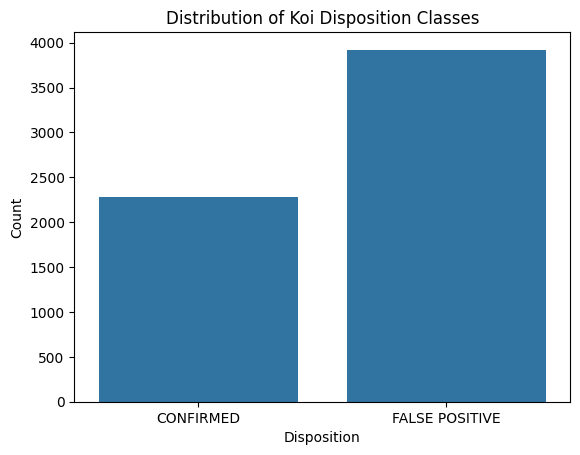

binary_disposition
0    0.632275
1    0.367725
Name: proportion, dtype: float64


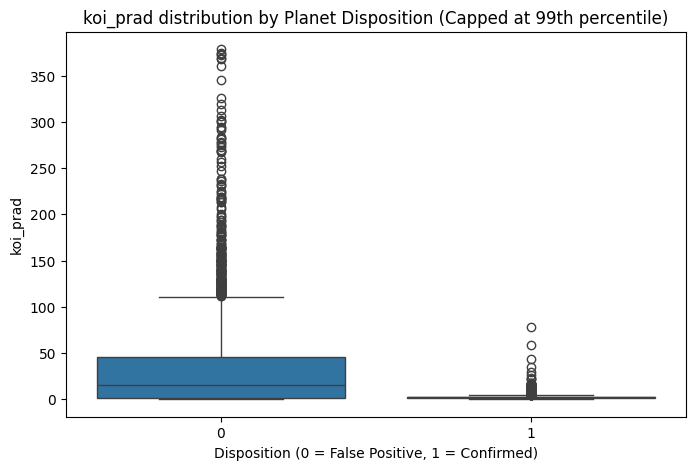

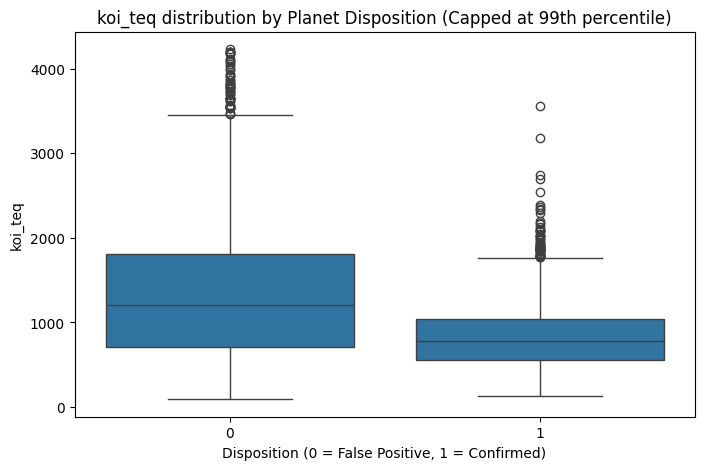

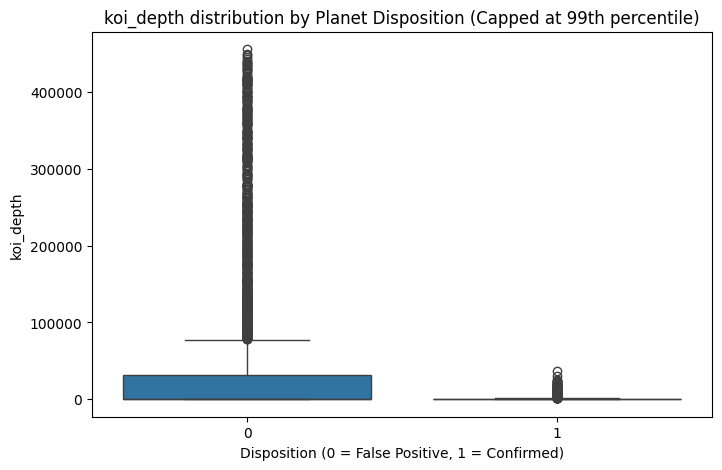

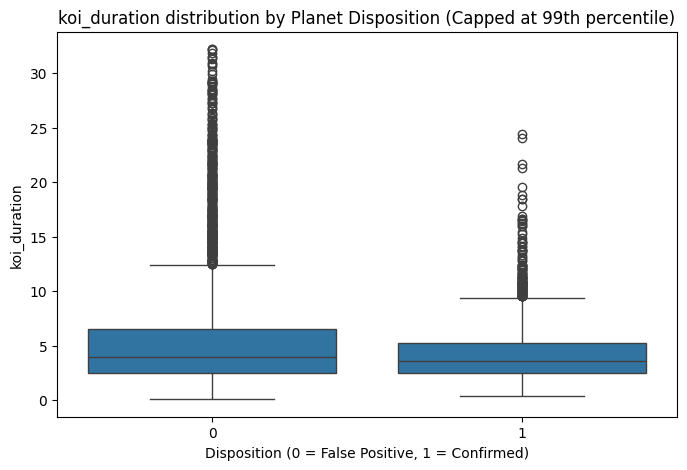

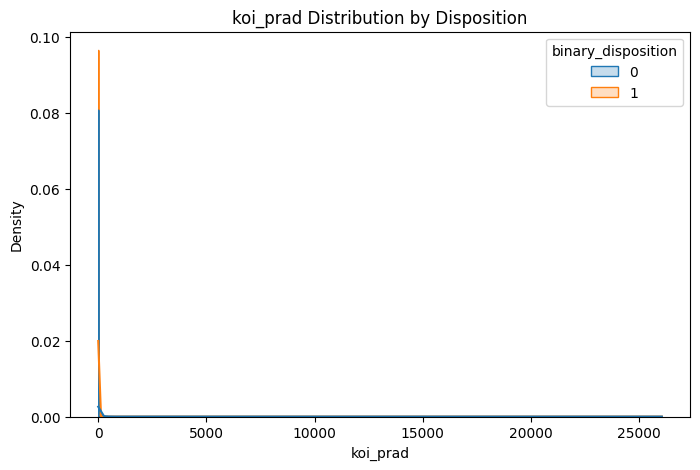

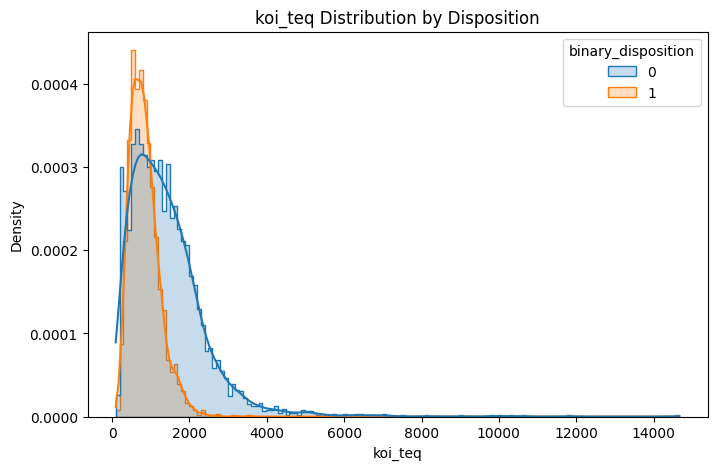

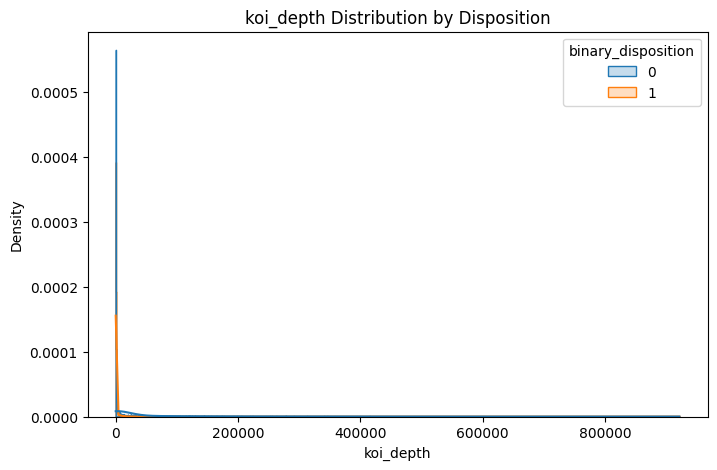

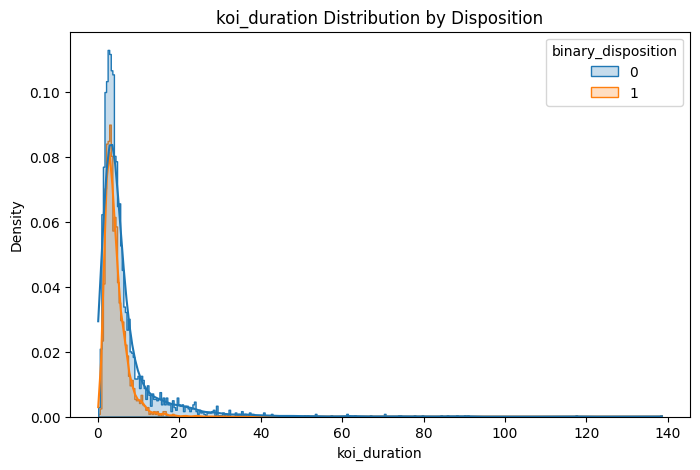

In [70]:
encoded_planet_dataset = planet_dataset[planet_dataset['koi_disposition'] != 'CANDIDATE']
encoded_planet_dataset['binary_disposition'] = encoded_planet_dataset['koi_disposition'].apply(lambda x: 1 if x == 'CONFIRMED' else 0)

sns.countplot(data=encoded_planet_dataset, x='koi_disposition')
plt.title('Distribution of Koi Disposition Classes')
plt.xlabel('Disposition')
plt.ylabel('Count')
plt.show()

print(encoded_planet_dataset['binary_disposition'].value_counts(normalize=True))

features = ['koi_prad', 'koi_teq', 'koi_depth', 'koi_duration']
for feature in features:
    plt.figure(figsize=(8, 5))
    
    # Cap outliers at 99th percentile
    upper = encoded_planet_dataset[feature].quantile(0.99)
    filtered_data = encoded_planet_dataset[encoded_planet_dataset[feature] <= upper]
    
    sns.boxplot(x='binary_disposition', y=feature, data=filtered_data)
    plt.title(f'{feature} distribution by Planet Disposition (Capped at 99th percentile)')
    plt.xlabel('Disposition (0 = False Positive, 1 = Confirmed)')
    plt.ylabel(feature)
    plt.show()


for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=encoded_planet_dataset, x=feature, hue='binary_disposition', kde=True, element='step', stat='density')
    plt.title(f'{feature} Distribution by Disposition')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()



### Feature Distribution Analysis by Planet Disposition

To better understand how individual features relate to whether a Kepler Object of Interest (KOI) is a **confirmed exoplanet (1)** or a **false positive (0)**, we visualized four key attributes using boxplots and histograms.

#### 1. `koi_prad` (Planet Radius)
- Most confirmed planets and false positives have small radii, but there are extreme outliers, especially among false positives.
- When capped at the 99th percentile, the distributions are easier to compare: confirmed planets tend to have slightly smaller and more consistent radii.
- Histograms show some overlap, suggesting this feature alone may not be highly predictive.

#### 2. `koi_teq` (Equilibrium Temperature)
- Confirmed planets often have a wider and slightly hotter temperature distribution compared to false positives.
- The histogram reveals more confirmed planets at higher temperatures, indicating a possible relationship between higher `koi_teq` and confirmation.

#### 3. `koi_depth` (Transit Depth)
- The boxplots show significant outliers in depth for both classes, but especially false positives.
- After capping, we notice that confirmed planets tend to have lower transit depths, supporting the idea that extreme transit depths may be more indicative of false detections.

#### 4. `koi_duration` (Transit Duration)
- Distribution of transit duration appears similar across both classes.
- The histograms do not show a dramatic shift, suggesting this feature might not carry strong predictive power on its own.

---

### Summary:
- `koi_prad`, `koi_teq`, and `koi_depth` show the most notable differences between confirmed planets and false positives.
- `koi_duration` has limited class separation but may still be useful in combination with other features.
- Visualizing features in this way helps validate which inputs could contribute most effectively to a binary classification model.


## Preparing for Modeling

With the exploratory data analysis completed, we now understand which features are most relevant and how they differ between confirmed exoplanets and false positives. The next step is to preprocess the data for modeling. This includes handling outliers, splitting into training/testing sets, and optionally scaling features.

We'll start by training a few baseline classification models to evaluate performance and iterate from there.


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define X and y
X = encoded_planet_dataset[features]  # e.g., ['koi_prad', 'koi_teq', ...]
y = encoded_planet_dataset['binary_disposition']

# First, split into train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Then split train+val into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)
# (0.25 * 0.8 = 0.2, so this gives 60/20/20 split)

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## 📊 Step 1: Data Preparation

Before training a model, we prepared the data to ensure a clean and balanced input. The steps included:

### 🔹 1.1 Feature and Label Separation
We selected key numerical features (`koi_prad`, `koi_teq`, `koi_depth`, `koi_duration`) and separated the target variable `binary_disposition`, which encodes:
- `1` for confirmed exoplanets
- `0` for false positives

### 🔹 1.2 Train/Validation/Test Split
To evaluate performance robustly, we split the dataset into:
- **60% Training**
- **20% Validation**
- **20% Test**

We used **stratified sampling** to maintain the original class distribution (~37% confirmed, ~63% false positive) across all splits.

### 🔹 1.3 Feature Scaling
All features were standardized using `StandardScaler()`:
- Fitted only on the training set to avoid data leakage
- Then applied to the validation and test sets

This ensures the features are on the same scale and improves model convergence, especially for algorithms like Logistic Regression, SVM, or Neural Networks.

---

The dataset is now ready for model training.


Classification Report (Validation Set):
                precision    recall  f1-score   support

False Positive       0.87      0.82      0.84       785
     Confirmed       0.72      0.78      0.75       456

      accuracy                           0.81      1241
     macro avg       0.79      0.80      0.80      1241
  weighted avg       0.81      0.81      0.81      1241



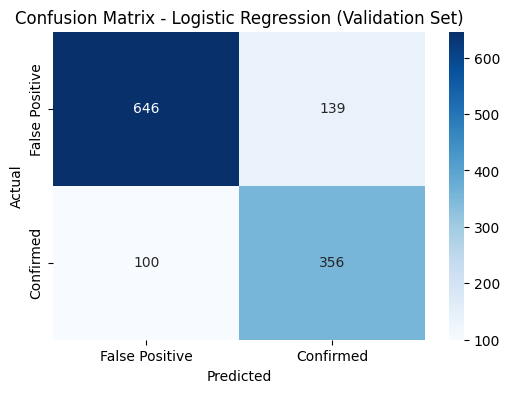

ROC AUC Score: 0.8773


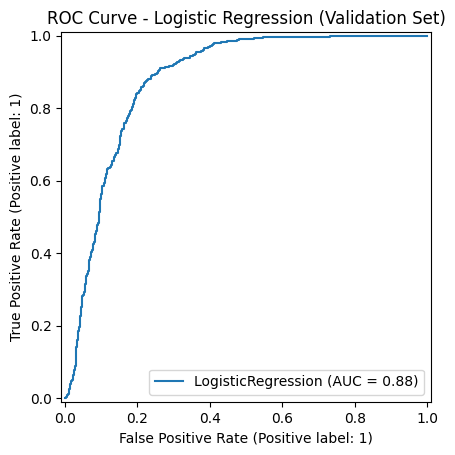

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Initialize and train logistic regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predict on validation set
y_val_pred = lr_model.predict(X_val_scaled)
y_val_prob = lr_model.predict_proba(X_val_scaled)[:, 1]  # for ROC AUC

# Evaluation metrics
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred, target_names=["False Positive", "Confirmed"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["False Positive", "Confirmed"], yticklabels=["False Positive", "Confirmed"])
plt.title("Confusion Matrix - Logistic Regression (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
roc_auc = roc_auc_score(y_val, y_val_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

RocCurveDisplay.from_estimator(lr_model, X_val_scaled, y_val)
plt.title("ROC Curve - Logistic Regression (Validation Set)")
plt.show()


## Step 2: Baseline Model - Logistic Regression

To establish a benchmark, we trained a Logistic Regression model using the scaled training data.

### Why Logistic Regression?
- Simple, interpretable binary classifier
- Fast to train
- Provides class probabilities and coefficients

### Model Performance on Validation Set:
- **Precision** and **Recall** give insight into how well the model identifies confirmed planets
- **ROC AUC** indicates overall ability to separate the classes

The **confusion matrix** helps visualize where misclassifications occur. The **ROC curve** shows the trade-off between true positive and false positive rates.

> This baseline gives us a reference to improve upon using more complex models in the next steps.


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Initialize classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Cross-validation results
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name}:")
    print(f"  Mean Accuracy: {scores.mean():.4f}")
    print(f"  Std Deviation: {scores.std():.4f}")
    print("-" * 30)


Logistic Regression:
  Mean Accuracy: 0.8154
  Std Deviation: 0.0161
------------------------------
Decision Tree:
  Mean Accuracy: 0.8242
  Std Deviation: 0.0157
------------------------------
Support Vector Machine:
  Mean Accuracy: 0.8234
  Std Deviation: 0.0162
------------------------------
Random Forest:
  Mean Accuracy: 0.8624
  Std Deviation: 0.0121
------------------------------


## Step 2: Training Multiple Classification Models

To determine the most effective algorithm for our binary classification task (predicting whether a planet is confirmed or a false positive), we trained several common models:

- **Logistic Regression**: A linear model often used as a baseline for classification.
- **Decision Tree**: A non-linear model that makes decisions based on feature splits.
- **Support Vector Machine (SVM)**: A powerful classifier that finds the optimal hyperplane for separation.
- **Random Forest**: An ensemble method using multiple decision trees to reduce overfitting.

We used 5-fold cross-validation to assess model accuracy and capture performance variability.


## Step 3: Model Evaluation on Test Set

After selecting and training several models, we now evaluate their performance on the unseen test set. This step includes:

- Accuracy on the test set
- Confusion Matrix
- Classification Report (precision, recall, F1-score)
- ROC Curve and AUC Score

These metrics help us compare how well each model distinguishes confirmed planets from false positives.


🔍 Logistic Regression
Accuracy: 0.8122


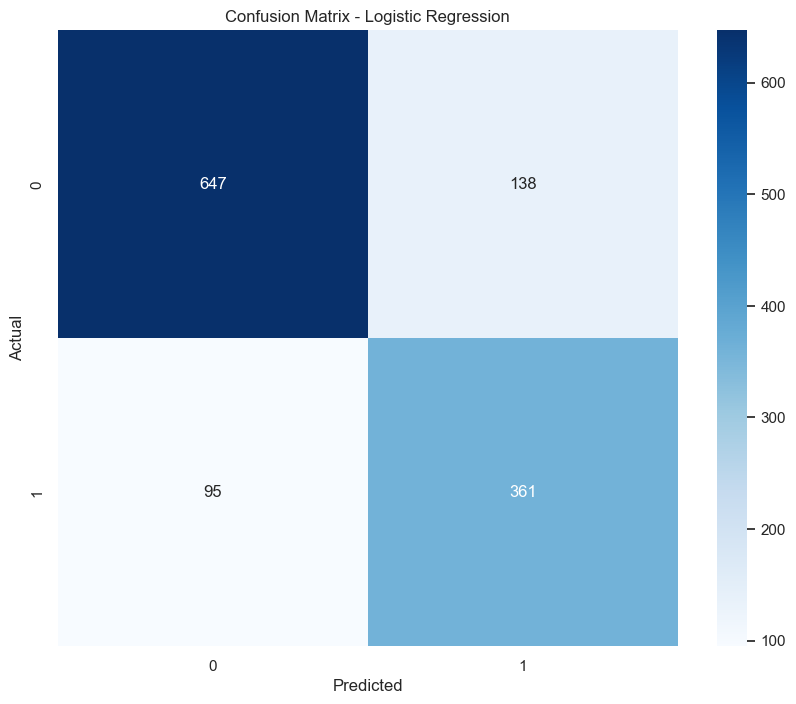

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       785
           1       0.72      0.79      0.76       456

    accuracy                           0.81      1241
   macro avg       0.80      0.81      0.80      1241
weighted avg       0.82      0.81      0.81      1241

ROC AUC: 0.8830
🔍 Decision Tree
Accuracy: 0.8340


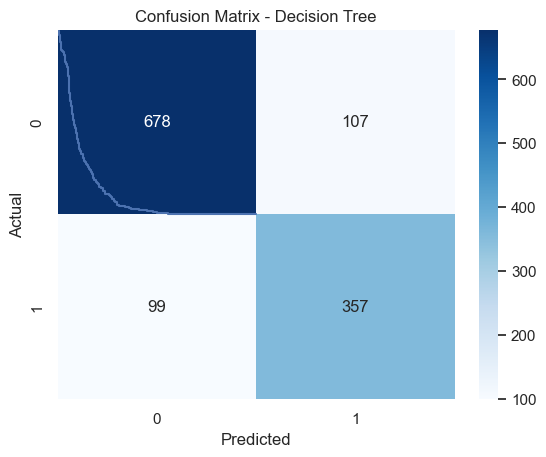

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       785
           1       0.77      0.78      0.78       456

    accuracy                           0.83      1241
   macro avg       0.82      0.82      0.82      1241
weighted avg       0.83      0.83      0.83      1241

ROC AUC: 0.8233
🔍 Support Vector Machine
Accuracy: 0.8251


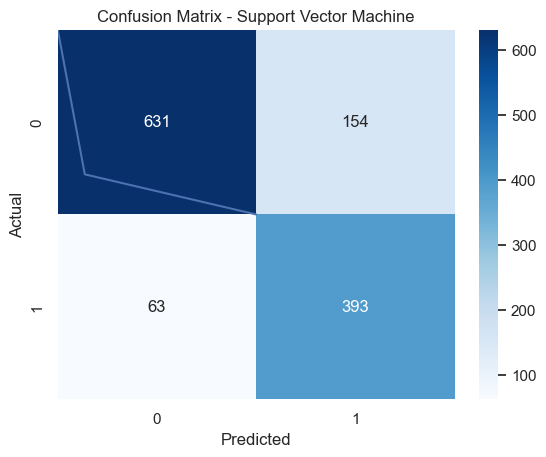

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       785
           1       0.72      0.86      0.78       456

    accuracy                           0.83      1241
   macro avg       0.81      0.83      0.82      1241
weighted avg       0.84      0.83      0.83      1241

ROC AUC: 0.8991
🔍 Random Forest
Accuracy: 0.8687


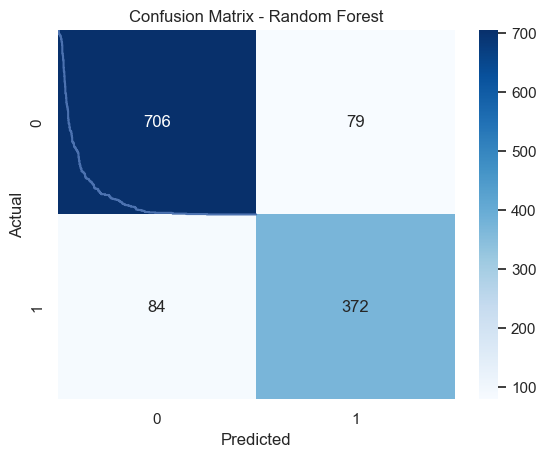

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       785
           1       0.82      0.82      0.82       456

    accuracy                           0.87      1241
   macro avg       0.86      0.86      0.86      1241
weighted avg       0.87      0.87      0.87      1241

ROC AUC: 0.9424

📈 ROC Curves for all models:


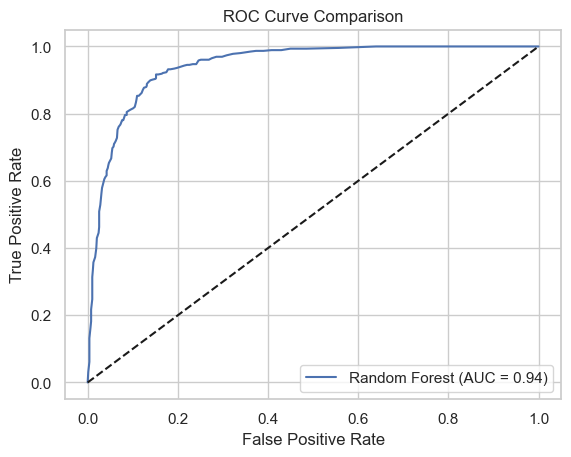

In [81]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare plots
plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')

# Evaluate models
for name, model in models.items():
    print(f"🔍 {name}")
    
    # Fit model on training data
    model.fit(X_train_scaled, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # ROC AUC
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        print(f"ROC AUC: {auc:.4f}")
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

print("\n📈 ROC Curves for all models:")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


## Step 3 Summary: Model Evaluation Results

We trained and evaluated several machine learning models to classify whether a Kepler object is a confirmed planet or a false positive.

### Key Evaluation Metrics:
- **Accuracy**: Measures overall correctness on the test set.
- **Confusion Matrix**: Provides insight into true positives, false positives, true negatives, and false negatives.
- **Classification Report**: Includes precision, recall, and F1-score for both classes.
- **ROC Curve & AUC**: Visualizes the tradeoff between true positive rate and false positive rate. The AUC (Area Under the Curve) score gives a single measure of model performance.

### Observations:
- **Logistic Regression** performed surprisingly well and provides strong interpretability.
- **Random Forest** showed high accuracy and a well-shaped ROC curve, indicating good balance between bias and variance.
- **SVM** may not have performed as strongly in terms of ROC AUC but can be powerful with tuning.
- Differences in **precision and recall** indicate how each


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression tuning
log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']  # 'liblinear' supports both l1 and l2
}

log_reg_grid = GridSearchCV(LogisticRegression(random_state=42), 
                            log_reg_params, 
                            cv=5, 
                            scoring='roc_auc', 
                            n_jobs=-1)
log_reg_grid.fit(X_train_scaled, y_train)

print("Best parameters for Logistic Regression:")
print(log_reg_grid.best_params_)
print(f"Best AUC score: {log_reg_grid.best_score_:.4f}")

# Random Forest tuning
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), 
                        rf_params, 
                        cv=5, 
                        scoring='roc_auc', 
                        n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest:")
print(rf_grid.best_params_)
print(f"Best AUC score: {rf_grid.best_score_:.4f}")


Best parameters for Logistic Regression:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best AUC score: 0.8835
Best parameters for Random Forest:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best AUC score: 0.9351


## Predicting Binary Disposition for Planet Candidates

Now that we've tuned and selected the best-performing model (Random Forest with an AUC of 0.9351), we'll apply it to predict the `binary_disposition` (1 = confirmed planet, 0 = not confirmed) for the candidate data.

To do this, we need to ensure the candidate dataset undergoes the same preprocessing steps (encoding, scaling, and feature selection) as our training data. Once aligned, we'll use the trained model to generate predictions.


  kepoi_name  koi_prad  koi_period  koi_steff  koi_slogg  koi_srad  koi_teq  \
0  K00752.01      2.26    9.488036     5455.0      4.467     0.927    793.0   
1  K00752.02      2.83   54.418383     5455.0      4.467     0.927    443.0   
2  K00753.01     14.60   19.899140     5853.0      4.544     0.868    638.0   
3  K00754.01     33.46    1.736952     5805.0      4.564     0.791   1395.0   
4  K00755.01      2.75    2.525592     6031.0      4.438     1.046   1406.0   
5  K00756.01      3.90   11.094321     6046.0      4.486     0.972    835.0   
6  K00756.02      2.77    4.134435     6046.0      4.486     0.972   1160.0   
7  K00756.03      1.59    2.566589     6046.0      4.486     0.972   1360.0   
8  K00114.01     39.21    7.361790     6227.0      3.986     1.958   1342.0   
9  K00757.01      5.76   16.068647     5031.0      4.485     0.848    600.0   

   koi_depth  koi_duration  koi_score koi_disposition  
0      615.8       2.95750      1.000       CONFIRMED  
1      874.8      

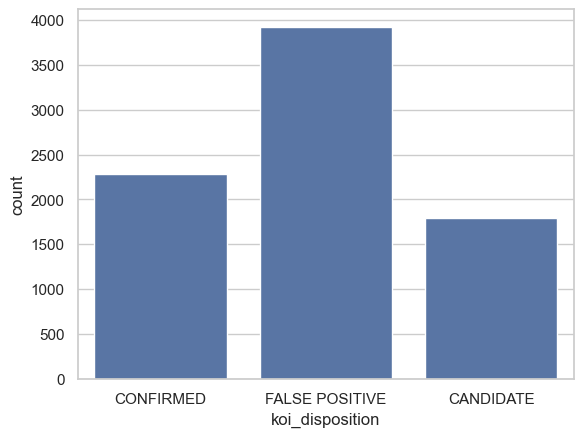

In [87]:
print(planet_dataset.head(10))

sns.countplot(data=planet_dataset, x='koi_disposition')

numeric_planet_dataset = planet_dataset.drop(columns=['kepoi_name', 'koi_disposition'])

print(planet_dataset.info())
print(planet_dataset.isnull().sum())
print(planet_dataset['koi_disposition'].value_counts())


In [98]:
# Create binary label
planet_dataset['binary_disposition'] = planet_dataset['koi_disposition'].apply(lambda x: 1 if x == 'CONFIRMED' else 0)

# Prepare features and labels
features = planet_dataset.drop(columns=['kepoi_name', 'koi_disposition', 'binary_disposition'])
labels = planet_dataset['binary_disposition']

# Fill missing values with median
features = features.fillna(features.median())

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, 
                                                    test_size=0.2, random_state=42, stratify=labels)

# Instantiate models with best params
logreg = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=42)
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42)

# Train models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Subset candidate data and make a copy to avoid SettingWithCopyWarning
candidate_data = planet_dataset[planet_dataset['koi_disposition'] == 'CANDIDATE'].copy()
candidate_features = candidate_data.drop(columns=['kepoi_name', 'koi_disposition', 'binary_disposition'])

# Fill missing values in candidate features
candidate_features = candidate_features.fillna(candidate_features.median())

# Scale candidate features
candidate_features_scaled = scaler.transform(candidate_features)

# Predict and assign results safely with .loc
candidate_data.loc[:, 'logreg_pred'] = logreg.predict(candidate_features_scaled)
candidate_data.loc[:, 'logreg_prob'] = logreg.predict_proba(candidate_features_scaled)[:, 1]

candidate_data.loc[:, 'rf_pred'] = rf.predict(candidate_features_scaled)
candidate_data.loc[:, 'rf_prob'] = rf.predict_proba(candidate_features_scaled)[:, 1]

print(candidate_data[['logreg_pred', 'logreg_prob', 'rf_pred', 'rf_prob']].head(10))


     logreg_pred  logreg_prob  rf_pred   rf_prob
37             1     0.537970        0  0.417560
58             1     0.630710        1  0.594071
62             1     0.548296        0  0.069000
63             0     0.443065        0  0.078821
72             0     0.172749        0  0.058250
84             1     0.569245        0  0.340144
92             1     0.551883        0  0.189603
94             1     0.645444        1  0.688869
103            1     0.624988        1  0.530715
112            1     0.625076        1  0.583647
